# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [1]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [2]:
#On importe les données dans un dataframe
df=pd.read_excel('historique_immobilier_paris_2017_2021_vdef2.xlsx')
df.head(5)

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [3]:
#On vérifie que le type des données attribué par pandas est cohérent
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [4]:
print('La liste des différents types de biens immobiliers que nous avons dans les données est:')
df[['code_type_local','type_local']].drop_duplicates()

La liste des différents types de biens immobiliers que nous avons dans les données est:


,code_type_local,type_local
0,2,Appartement
18,4,Local industriel. commercial ou assimilé


On observe qu'il y a 2 types de biens: les appartements et les locaux industriels, commerciaux et assimilés.
Et que leurs codes types sont 2 pour les appartements et 4 pour les autres. 

### 3. Nombre de transactions

In [5]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print(f"Le nombre de transactions dans les données est {df.shape[0]}")
print(f"Le nombre de transactions pour les appartements dans les données est {(df.loc[df['code_type_local'] == 2]).value_counts().sum()}")
print(f"Le nombre de transactions pour les locaux commerciaux dans les données est {(df.loc[df['code_type_local'] == 4]).value_counts().sum()}")

Le nombre de transactions dans les données est 26196
Le nombre de transactions pour les appartements dans les données est 24353
Le nombre de transactions pour les locaux commerciaux dans les données est 1843


### 4. interval de l'historique des données

In [6]:
#On vérifie également la plage de l'historique disponible
print(f"La première date de transaction dans les données est le {df['date_mutation'].min()}")
print(f"La dernière date de transaction dans les données est le {df['date_mutation'].max()}")

La première date de transaction dans les données est le 2017-01-02 00:00:00
La dernière date de transaction dans les données est le 2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [7]:
# Calcul de la colonne
df['prix_metre_carre']=round((df['valeur_fonciere']/df['surface_reelle']),2)

Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [8]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df_appartement=df.drop(columns=['adresse_numero','adresse_nom_voie','code_type_local','nom_commune'])[df['code_type_local']==2]
df_appartement.head(5)

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_metre_carre
0,2017-01-03,5.505597e+05,75003,Appartement,50,11011.19
1,2017-01-12,1.576492e+06,75008,Appartement,163,9671.73
2,2017-01-10,6.577574e+05,75008,Appartement,66,9966.02
3,2017-01-10,2.500868e+05,75003,Appartement,22,11367.58
4,2017-01-13,1.762667e+05,75001,Appartement,15,11751.11


In [9]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
df1=df_appartement[['prix_metre_carre','surface_reelle']].groupby(df_appartement.date_mutation.dt.year).mean()
df1 = df1.rename(columns={'prix_metre_carre': 'moyenne_prix_metre_carre'})
df1 = df1.rename(columns={'surface_reelle': 'moyenne_surface_reelle'})
df1

,moyenne_prix_metre_carre,moyenne_surface_reelle
date_mutation,,
2017,9492.859239,44.627737
2018,10031.403469,44.271671
2019,10562.712563,43.361645
2020,10674.872719,42.900654
2021,10455.600179,43.479864


On constate que la moyenne des prix de vente des appartements à Paris qu'elle a augmenté entre 2017 et 2020 avec un taux de 5% entre 2017 et 2019 puis de 1% en 2020. 
On observe une légère baisse en 2021 de 2%. <br>

Nous allons créer un graphique pour mieux le visualiser.

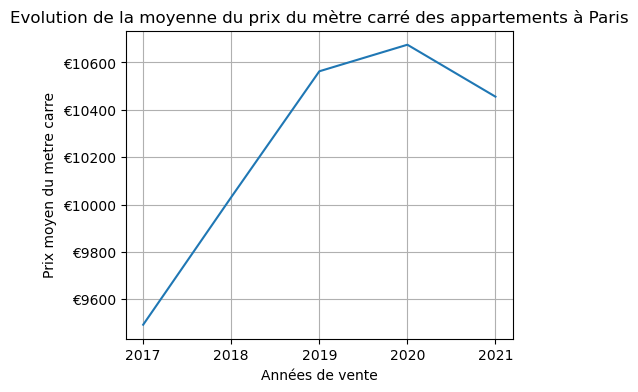

In [10]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(5,4))
plt.plot(['2017','2018','2019','2020','2021'],df1['moyenne_prix_metre_carre'])
plt.xlabel('Années de vente')
plt.ylabel('Prix moyen du metre carre')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution de la moyenne du prix du mètre carré des appartements à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [11]:
#Liste des codes postaux dans nos données.
print (f"La liste des codes postaux de Paris est: {df_appartement['code_postal'].unique()}")

La liste des codes postaux de Paris est: [75003 75008 75001 75006 75005 75007 75010 75009 75011 75012 75013 75014
 75015 75016 75017 75018 75020 75019 75004 75002]


In [12]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
df2=df_appartement[['prix_metre_carre','code_postal']].groupby([df_appartement.date_mutation.dt.year,'code_postal'],as_index=False).mean()
df2 = df2.rename(columns={'prix_metre_carre': 'moyenne_prix_metre_carre'})
df2 = df2.rename(columns={'date_mutation': 'annee_mutation'})
df2.iloc

,code_postal,moyenne_prix_metre_carre
0,75001,11762.706207
1,75002,10920.126744
2,75003,11679.818596
3,75004,12407.227778
4,75005,11306.752308
...,...,...
95,75016,10790.307890
96,75017,10372.368830
97,75018,9665.640703
98,75019,8828.586130


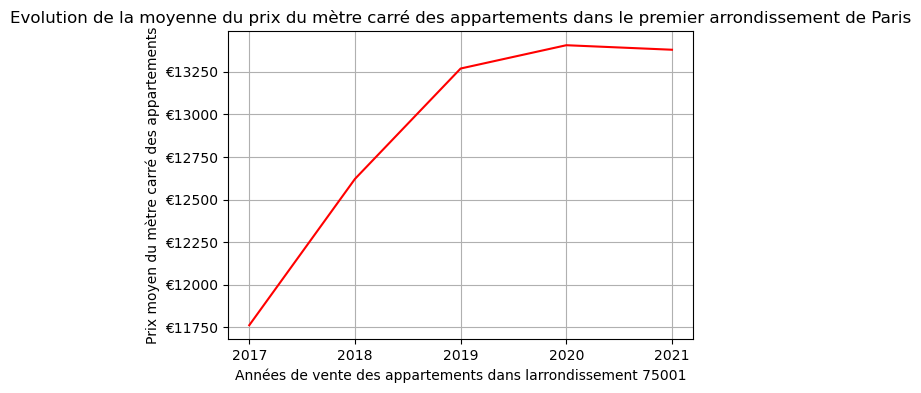

In [13]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
plt.figure(figsize=(6,4))
plt.plot(['2017','2018','2019','2020','2021'],df2.loc[df2['code_postal']==75001]['moyenne_prix_metre_carre'],color='red')
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.ylabel('Prix moyen du mètre carré des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution de la moyenne du prix du mètre carré des appartements dans le premier arrondissement de Paris')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

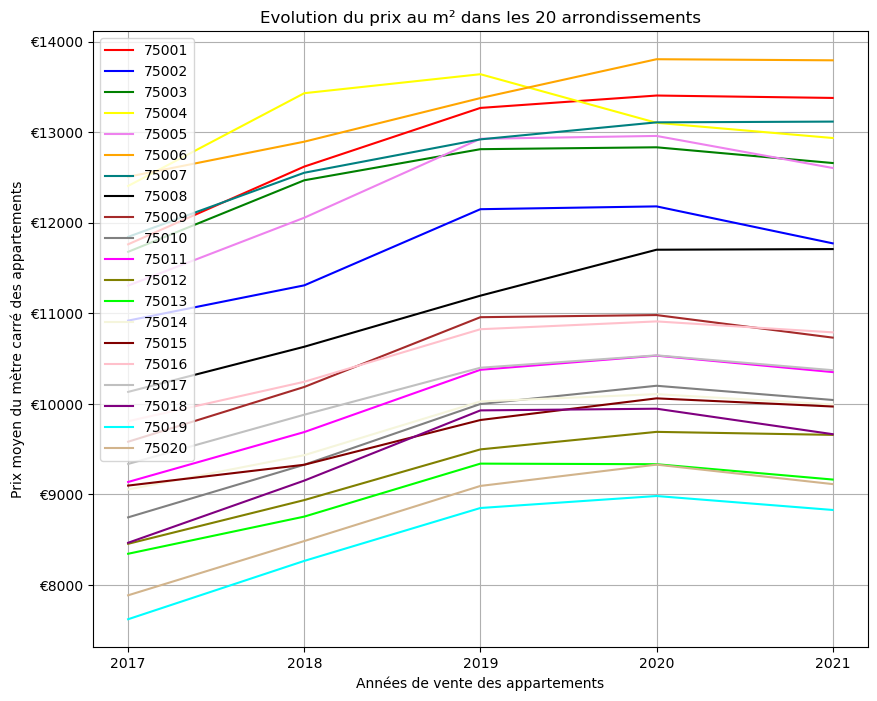

In [14]:
plt.figure(figsize=(10,8))
interval_historique=['2017','2018','2019','2020','2021']

codes_postaux = df2['code_postal'].unique()
colors = ['red', 'blue', 'green', 'yellow', 'violet', 'orange', 'teal', 'black', 'brown', 'gray', 
          'magenta', 'olive', 'lime', 'beige', 'maroon', 'pink', 'silver', 'purple', 'cyan', 'tan']

for i, code_postal in enumerate(codes_postaux):
    plt.plot(interval_historique, df2.loc[df2['code_postal']==code_postal]['moyenne_prix_metre_carre'], color=colors[i], label=str(code_postal))

plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix moyen du mètre carré des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.show()

On observe globalement que les prix ont augmenté dans tous les arrondissements.
Cette augmentation devient moins importante à partir de 2019.
à partir de 2020, les prix baissent dans la plupart des arrondissements ou se stabilisent dans d'autres (6e, 1e, 3e, 8e)

In [15]:
#Observons les prix pour 2021 pour vérifier cette différence de prix
df3=df_appartement[['prix_metre_carre','code_postal']].groupby([df_appartement.date_mutation.dt.year==2021,'code_postal'],as_index=False).mean()
df3=df3.rename(columns = {'prix_metre_carre':'moyenne_prix_metre_carre'})
df3.tail(20).sort_values(by='moyenne_prix_metre_carre', ascending=False)


,code_postal,moyenne_prix_metre_carre
25,75006,13795.048857
20,75001,13379.498571
26,75007,13118.135889
23,75004,12936.958317
22,75003,12660.546667
24,75005,12605.844118
21,75002,11773.445630
27,75008,11710.094742
35,75016,10790.307890
28,75009,10732.184688


### 7. Prix au metre carré par transaction dans un arrondissement

In [16]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
(df_appartement.loc[df_appartement['code_postal'] == 75006]).value_counts().sum()
print (f"Le nombre de transactions effectuées dans le 6ème arrondissement de Paris est: {df_appartement.loc[df_appartement['code_postal'] == 75006].value_counts().sum()}")

Le nombre de transactions effectuées dans le 6ème arrondissement de Paris est: 709


On constate qu'il y'a 709 transactions sur lesquelles le prix moyen du mètre carré a été calculé.

Affichons l'historique des transactions pour visualiser la dispersion des données :

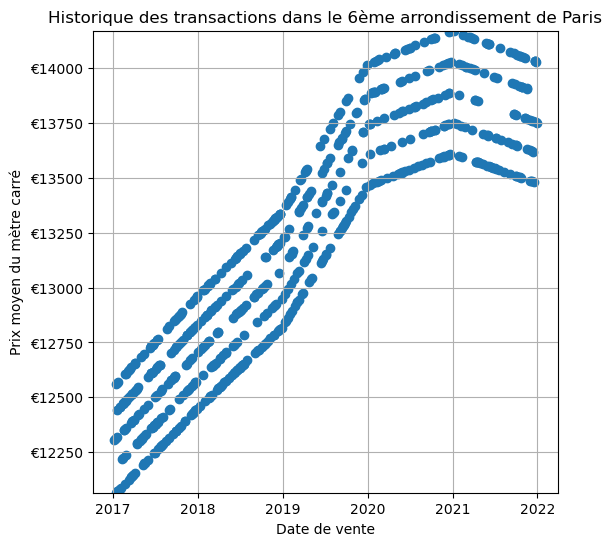

In [17]:
code_postal=75006
plt.figure(figsize=(6,6))
#Insérer ci-dessous le scatter plot
plt.scatter(df_appartement.loc[df_appartement['code_postal']==code_postal]['date_mutation'],df_appartement.loc[df_appartement['code_postal']==code_postal]['prix_metre_carre'])
plt.xlabel('Date de vente')
plt.ylabel('Prix moyen du mètre carré')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(df_appartement.loc[df_appartement['code_postal']==code_postal]['prix_metre_carre'].min(),df_appartement.loc[df_appartement['code_postal']==code_postal]['prix_metre_carre'].max())
plt.grid(which='both')
plt.title('Historique des transactions dans le 6ème arrondissement de Paris')
plt.show()

On observe qu'il y a une distribution cohérente tout autour de la moyenne du prix du mètre carré ainsi qu'une dispersion des données qui ne fait pas ressortir de valeurs abbérantes.

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [18]:
#On calcule la corrélation de Spearman
from scipy import stats
stats.pearsonr((df_appartement.loc[df_appartement['code_postal']==75006]['date_mutation'].astype('datetime64[s]').astype('int64') / 10**9), df_appartement.loc[df_appartement['code_postal']==75006]['prix_metre_carre'])

PearsonRResult(statistic=0.9038445780332465, pvalue=7.109002386556297e-263)

Ce calcul permet de mesurer le sens, la force et la significativité de l'association entre la variable du prix moyen du mètre carré et celle de la date de vente pour les appartements situés dans le 6ème arrondissement. 

Le coéfficient étant de 0,90 nous sommes en mesure d'établir l'existence d'une corrélation forte entre les deux variables dans le même sens.
La pvalue étant significative puisqu'elle est très inférieure à 0.05, on peut dire que ce résultat n'est pas dû au hasard. 

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [19]:
stats.pearsonr(df_appartement.loc[df_appartement['code_postal']==75006]['surface_reelle'],df_appartement.loc[df_appartement['code_postal']==75006]['valeur_fonciere'])

PearsonRResult(statistic=0.9977572898250295, pvalue=0.0)

Ce calcul permet de mesurer le sens et la force de l'association entre la variable de la valeur foncière et celle de la surface de l'appartement. Ce calcul permet aussi de déterminer le degrès de significativité des résultats.

Le coéfficient étant de 0,99 nous sommes en mesure d'établir l'existence d'une forte corrélation entre les deux variables.

Par ailleurs, la pvalue étant très inférieure au seuil de significativité alpha de 0,05 le résultat est donc significatif. Il y a moins de 5% de risque que le résultat soit dû à des aléas ou au hasard.

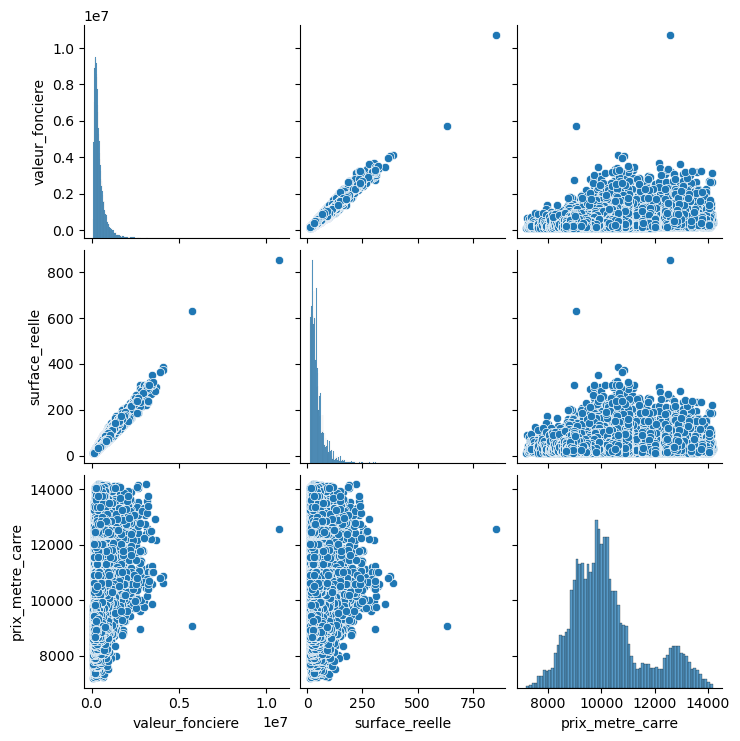

In [20]:
#Visualisation des relations grâce à des graphiques statistiques
df_appartements_sns=df_appartement.drop(columns=['code_postal'])
sns.pairplot(df_appartements_sns)

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [21]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_locaux=df.drop(columns=['adresse_numero','adresse_nom_voie','nom_commune'])[df['code_type_local']==4]
df_locaux['prix_metre_carre']=df_locaux['valeur_fonciere']/df_locaux['surface_reelle']
df_locaux.head(5)

,date_mutation,valeur_fonciere,code_postal,code_type_local,type_local,surface_reelle,prix_metre_carre
18,2017-02-01,3.113277e+06,75003,4,Local industriel. commercial ou assimilé,250,12453.109192
29,2017-02-17,1.164375e+06,75003,4,Local industriel. commercial ou assimilé,95,12256.581685
34,2017-02-20,3.802522e+05,75003,4,Local industriel. commercial ou assimilé,31,12266.199603
91,2017-03-09,3.623842e+05,75001,4,Local industriel. commercial ou assimilé,29,12496.006027
109,2017-03-29,3.159072e+05,75003,4,Local industriel. commercial ou assimilé,25,12636.289027


In [22]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année
df4=df_locaux[['prix_metre_carre']].groupby(df_locaux.date_mutation.dt.year).mean()
df4=df4.rename(columns = {'prix_metre_carre':'moyenne_prix_metre_carre_locaux'})

df5=df_appartement[['prix_metre_carre']].groupby(df_appartement.date_mutation.dt.year).mean()
df5=df5.rename(columns = {'prix_metre_carre':'moyenne_prix_metre_carre_appart'})

df4

,moyenne_prix_metre_carre_locaux
date_mutation,
2017,10949.909217
2018,11569.499180
2019,11960.132050
2020,11966.470204
2021,12006.488691


In [23]:
# Regroupons les moyennes de prix du mètre carré par type_local
comparatif_prix = pd.DataFrame({'moyenne_prix_metre_carre_appart': df5['moyenne_prix_metre_carre_appart'],'moyenne_prix_metre_carre_locaux': df4['moyenne_prix_metre_carre_locaux'] })
comparatif_prix

,moyenne_prix_metre_carre_appart,moyenne_prix_metre_carre_locaux
date_mutation,,
2017,9492.859239,10949.909217
2018,10031.403469,11569.499180
2019,10562.712563,11960.132050
2020,10674.872719,11966.470204
2021,10455.600179,12006.488691


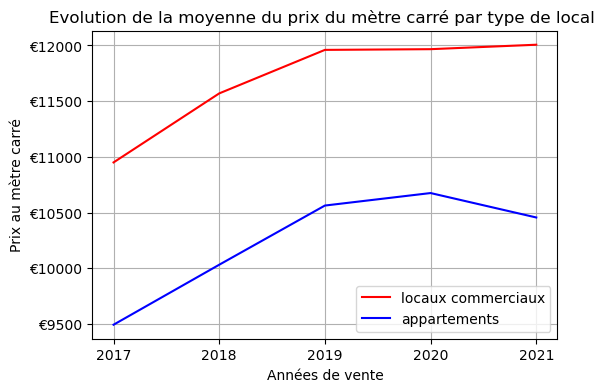

In [24]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(6,4))
plt.plot(['2017','2018','2019','2020','2021'],df4['moyenne_prix_metre_carre_locaux'],label='locaux commerciaux',color='red')
plt.plot(['2017','2018','2019','2020','2021'],df5['moyenne_prix_metre_carre_appart'],label='appartements',color='blue')
plt.xlabel('Années de vente')
plt.ylabel('Prix au mètre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution de la moyenne du prix du mètre carré par type de local ')
plt.show()

Le prix au metre carré des locaux commerciaux est proche de celui des appartements avec une augmentation entre 2017 et 2020.

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [25]:
#Il permet d'éviter les biais dans le traitement des variables en considérant chaque valeur de manière égale; Cette méthode d'encodage peut travailler avec des variables comprenant un grand nombre de catégoriesdf_encode=(pd.get_dummies(df['code_postal']))
df_encode=df.join(pd.get_dummies(df['code_postal']))
df_encode=df_encode.join(pd.get_dummies(df['type_local']))
df_encode['timestamp']=df['date_mutation'].astype('datetime64[s]').astype('int64') / 10**9
df_encode.drop(['code_postal','date_mutation','code_type_local','type_local','adresse_numero','adresse_nom_voie','nom_commune','prix_metre_carre'],axis='columns',inplace=True)
df_encode.head()

,valeur_fonciere,surface_reelle,75001,75002,75003,75004,75005,75006,75007,75008,...,75014,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé,timestamp
0,5.505597e+05,50,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.483402e+09
1,1.576492e+06,163,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1.484179e+09
2,6.577574e+05,66,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1.484006e+09
3,2.500868e+05,22,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.484006e+09
4,1.762667e+05,15,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.484266e+09


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [26]:
# On importe le train test split de la librairie sk_learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
#Définition des tableaux de données X et Y
X=df_encode.iloc[:,1:] 
Y=df_encode.iloc[:,0]

In [28]:
# La valeur y à trouver est la valeur foncière
# Répartir nos données 33% à mettre de côté et 67% pour faire le test
#Choisir la bonne valeur du random state pour assurer la reproductibilité des résultats et la minimisation du pourcentage d'erreur
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.33, random_state=6)

In [29]:
#conversion des données en str
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [30]:
#On entraîne l'algorithme 
reg = LinearRegression(fit_intercept=False).fit(X_train,Y_train)

In [31]:
# Calcul  des coefficients
#coeff_df=pd.DataFrame(reg.coef_,X.columns,columns=['coefficient'])
#coeff_df
print (reg.coef_)

[ 1.04141766e+04  4.22681786e+04 -2.24882859e+04  1.23517555e+04
  5.02807926e+04 -8.99930396e+03  7.93603332e+04  5.91846703e+04
 -1.73015701e+04 -7.81810838e+04 -1.15599777e+05 -9.77533297e+04
 -1.31215172e+05 -1.35920992e+05 -1.13080069e+05 -1.14031331e+05
 -7.13553233e+04 -9.63798193e+04 -1.18561120e+05 -1.60748857e+05
 -1.44573690e+05 -6.37183090e+05 -5.45560871e+05  4.59284779e-04]


In [32]:
#Procéder à des prédictions grâce au modèle
Y_predict= reg.predict(X_test)
Y_predict

array([ 392211.58967031,  473265.04639127,  740301.08113826, ...,
        560157.16090185,  326901.46178649, 1689517.3387289 ])

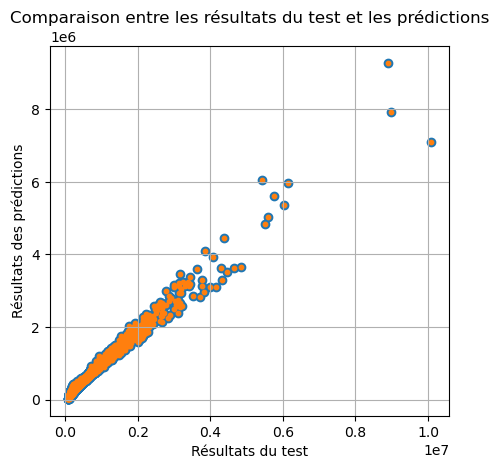

In [33]:
#Créer un grapgique pour comparer les résultats des prédictions avec ceux du test 
plt.scatter(Y_test, Y_predict)
colorL=np.array(['red','blue'])
plt.scatter(Y_test, Y_predict,s=10)
plt.xlabel('Résultats du test')
plt.ylabel('Résultats des prédictions')
plt.grid()
plt.title('Comparaison entre les résultats du test et les prédictions')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [34]:
# Calculons les métriques d'évaluation
from sklearn import metrics
# Calcul du MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_test,Y_predict)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))
print ('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)))
print ('R2:',metrics.r2_score(Y_test,Y_predict))

#Cela permet d'évaluer la précision du modèle de régression linéaire en termes de prédiction des valeurs de Y_test.
#Le résultat de notre R² se rapproche de 1 donc notre modèle possède un bon ajustement aux données. Il arrive à prédire de manière assez précise les valeurs observées. 

Mean Absolute Percentage Error (MAPE): 8.93%
RMSE: 71404.0297582815
R2: 0.9770623397014342


In [35]:
#Ce code calcule le pourcentage d'erreur entre les valeurs Y_test et les valeurs prédites Y_predict
#Cela permet d'évaluer la précision du modèle de régression linéaire en termes de prédiction des valeurs de Y_test.
#(np.mean(abs(Y_test-Y_predict)/Y_test))*100

Notre algorithme fait donc 8,9% d'erreur en moyenne sur la prédiction de la valeur foncière. C'est avec le random state 6 qu'on obteint le taux d'erreur le plus bas. 

Observations, conclusions et axes d'améliorations:

- Il en ressort des résultats que la variable du code postal ne suffit pas à elle seule pour avoir des prédictions pértinentes, il serait intéressant de voir des critères tels que l'attractivité du quartier car certains sont mieux quotés que d'autres, mais aussi, la nature du local (neuf ou ancien), les prestations supplémentaires comme un jardin, un balcon, une vue sur la Tour Eiffel, mais aussi le nombre de pièces.
- Le modèle de régression linéaire n'est pas très adapté à la prédiction des prix de l'immobilier on pourrait à la place imaginer faire ça avec (Forêts aléatoires) qui combine plusieurs modèles d'arbres de décision pour produire des prédictions plus robustes et précises. Elle est souvent utilisée pour prédire les prix de l'immobilier en raison de sa flexibilité et de sa capacité à gérer de grandes quantités de données.

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [36]:
#On importe les données dans un dataframe
actifs = pd.read_excel ('portefeuille_actifs.xlsx')
actifs.head(5)

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


In [37]:
#Identifier la nature des données 
actifs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adresse_numero             275 non-null    int64  
 1   adresse_nom_voie           275 non-null    object 
 2   code_postal                275 non-null    int64  
 3   code_commune               275 non-null    int64  
 4   nom_commune                275 non-null    object 
 5   surface_carrez             275 non-null    float64
 6   code_type_local            275 non-null    int64  
 7   type_local                 275 non-null    object 
 8   surface_reelle_bati        275 non-null    int64  
 9   nombre_pieces_principales  275 non-null    int64  
 10  longitude                  275 non-null    float64
 11  latitude                   275 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 25.9+ KB


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [38]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
actifs_encode=actifs.join(pd.get_dummies(actifs['code_postal']))
actifs_encode=actifs_encode.join(pd.get_dummies(actifs['type_local']))

In [39]:
#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt

actifs_encode['timestamp']=int(dt.datetime(2022, 12, 31).timestamp())
actifs_encode.drop(['code_postal','code_type_local','type_local','adresse_numero','adresse_nom_voie','nom_commune','code_commune','surface_carrez','nombre_pieces_principales','latitude','longitude'],axis='columns',inplace=True)
actifs_encode.rename(columns={'surface_reelle_bati':'surface_reelle'}, inplace=True)
actifs_encode.head(5)

,surface_reelle,75001,75002,75003,75004,75005,75006,75007,75008,75009,...,75014,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé,timestamp
0,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672441200
1,22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672441200
2,65,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672441200
3,74,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1672441200
4,22,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1672441200


In [40]:
#Conversion du dataframe en str
actifs_encode.columns =actifs_encode.columns.astype(str)

Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [41]:
#On effectue la prédiction
Y_predict_final=reg.predict(actifs_encode)

#On vérifie les 10 premières valeurs
Y_predict_final[:10]

array([433566.28995415, 372407.33703879, 820216.93031708, 884291.19407152,
       342754.01150243, 478138.3071447 , 393235.69021452, 640194.51470595,
       149119.81978214, 147766.87185987])

Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [42]:
predictions_portefeuille=actifs_encode
predictions_portefeuille['valeur_fonciere_prediction']=Y_predict_final
predictions_portefeuille.head()

,surface_reelle,75001,75002,75003,75004,75005,75006,75007,75008,75009,...,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé,timestamp,valeur_fonciere_prediction
0,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,433566.289954
1,22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,372407.337039
2,65,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,820216.930317
3,74,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1672441200,884291.194072
4,22,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1672441200,342754.011502


In [43]:
#Valorisation du portefeuille sur le segment des particuliers
particuliers=round((predictions_portefeuille.loc[predictions_portefeuille['Appartement']==1]['valeur_fonciere_prediction'].sum()/1000000),2)
print(f"La valorisation du segment particulier est de {particuliers} millions euros")


La valorisation du segment particulier est de 71.24 millions euros


In [44]:
#Valorisation du portefeuille sur le segment corporate
corporate=round((predictions_portefeuille.loc[predictions_portefeuille['Local industriel. commercial ou assimilé']==1]['valeur_fonciere_prediction'].sum()/1000000),2)
print(f"La valorisation du segment corporate est de {corporate} millions euros")


La valorisation du segment corporate est de 98.32 millions euros


In [45]:
#Créer un fichier regroupant les résultats des deux taux de variation pour les comparer
df5['Taux de variation_appartements'] = df5['moyenne_prix_metre_carre_appart'].pct_change() * 100
df4['Taux de variation_locaux'] = df4['moyenne_prix_metre_carre_locaux'].pct_change() * 100
comparatif_variations = pd.DataFrame({'Taux de variation_appartements': df5['Taux de variation_appartements'], 'Taux de variation_locaux': df4['Taux de variation_locaux'] })
comparatif_variations

,Taux de variation_appartements,Taux de variation_locaux
date_mutation,,
2017,NaN,NaN
2018,5.673151,5.658403
2019,5.296458,3.376403
2020,1.061850,0.052994
2021,-2.054100,0.334422


In [46]:
lots_appartements=(actifs.loc[actifs['type_local'] == "Appartement"]).value_counts().sum()
lots_locaux=(actifs.loc[actifs['type_local'] == "Local industriel. commercial ou assimilé"]).value_counts().sum()

proportion_valorisation_appartement=round((particuliers/lots_appartements*1000000),2)
proportion_valorisation_locaux=round((corporate/lots_locaux*1000000),2)

print(f"Le nombre de lots pour le segment particulier est {lots_appartements}, ce qui représente {proportion_valorisation_appartement}" "\n")
print(f"Le nombre de lots pour le segment corporate est {lots_locaux}, ce qui représente {proportion_valorisation_locaux}")

Le nombre de lots pour le segment particulier est 154, ce qui représente 462597.4

Le nombre de lots pour le segment corporate est 121, ce qui représente 812561.98


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- La valorisation du segment corporate est supérieur à celui du segment particulier.
- En regardant le taux de variation du prix, on se rend compte que les appartements etaient mieux valorisés de 2018 à 2020 avant de connaitre une chute en 2021.
- Cependant, il faut noter que le modèle ayant une marge d'erreur de 8,9% cette différence doit faire l'objet d'une méthode de prédiction plus fléxible et qui prend en considération des facteurs impactants tels que la remontée des taux des banques centrales qui va dissuader de futurs acquéreurs.

# Milestone 4 - Clustering des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [47]:
#On importe les données dans un dataframe
clustering_data=pd.read_excel("echantillon_a_classer2.xlsx")
clustering_data.head(5)

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [48]:
clustering_data_encode=clustering_data
clustering_data_encode['prix_metre_carre']=clustering_data_encode['valeur_fonciere']/clustering_data_encode['surface_reelle']
clustering_data_encode.drop(columns=['code_postal','nom_commune','valeur_fonciere'],inplace=True)
clustering_data_encode.sort_values(by="surface_reelle",ascending=False).head()

,surface_reelle,prix_metre_carre
17,99,9949.544452
32,98,10113.195822
39,96,9771.486096
0,88,9871.444128
23,65,7437.880186


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

<Axes: xlabel='prix_metre_carre', ylabel='surface_reelle'>

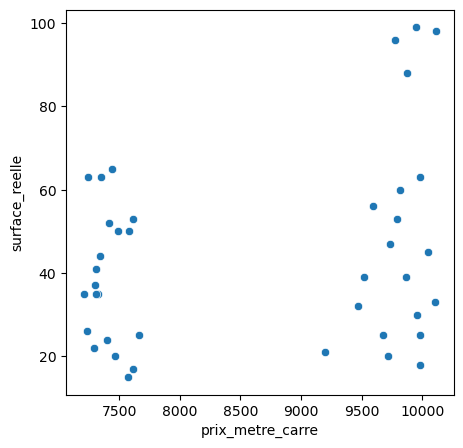

In [49]:
#Afficher un graphique en nuage de point
plt.figure(figsize = (5,5))
sns.scatterplot(data = clustering_data,  x = 'prix_metre_carre', y='surface_reelle')


In [50]:
from sklearn.cluster import KMeans
#Créer les 2 clusters Kmeans et les appliquer à notre dataset à savoir les deux types de biens : appartement ou Local industriel. commercial ou assimilé

clusters_predictions= KMeans(n_clusters=2, n_init=10, random_state=0).fit_predict(clustering_data_encode)



C:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\User\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(execut

In [51]:
# On crée une colonne qui classe les biens en fonctions des 2 clusters

clustering_data_encode['clusters_predictions']=clusters_predictions


In [52]:
# On vérifie les données de la prédiction
prédictions=clustering_data_encode.sort_values(by="surface_reelle",ascending=False)
prédictions.head()

,surface_reelle,prix_metre_carre,clusters_predictions
17,99,9949.544452,1
32,98,10113.195822,1
39,96,9771.486096,1
0,88,9871.444128,1
23,65,7437.880186,0


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

In [53]:
#On crée une colonne nature_du_bien en se basant sur la colonne clusters_predictions (on remplace 1 par "Local industriel. commercial ou assimilé" et 0 par "Appartement")

for i in clustering_data_encode.index:
    
    if round(clustering_data_encode.loc[i,'clusters_predictions'])==1:
        clustering_data_encode.loc[i,'nature_du_bien']='Local industriel. commercial ou assimilé'
              
    else :
        clustering_data_encode.loc[i,'nature_du_bien']='Appartement'
        
#On supprime la colonne clusters_predictions qui n'a plus d'utilité 
clustering_data_encode.drop('clusters_predictions',axis=1,inplace=True)

#On affiche les résultats
resultats=clustering_data_encode.sort_values(by="surface_reelle",ascending=False)
resultats.head()

,surface_reelle,prix_metre_carre,nature_du_bien
17,99,9949.544452,Local industriel. commercial ou assimilé
32,98,10113.195822,Local industriel. commercial ou assimilé
39,96,9771.486096,Local industriel. commercial ou assimilé
0,88,9871.444128,Local industriel. commercial ou assimilé
23,65,7437.880186,Appartement


In [54]:
#Calculer le nombre d'appartements et locaux de l'échantillon à classer

occurrences = clustering_data_encode['nature_du_bien'].value_counts()
print(occurrences)

Local industriel. commercial ou assimilé    20
Appartement                                 20
Name: nature_du_bien, dtype: int64


# Milestone 5 - Analyse et présentation des résultats

<Axes: xlabel='prix_metre_carre', ylabel='surface_reelle'>

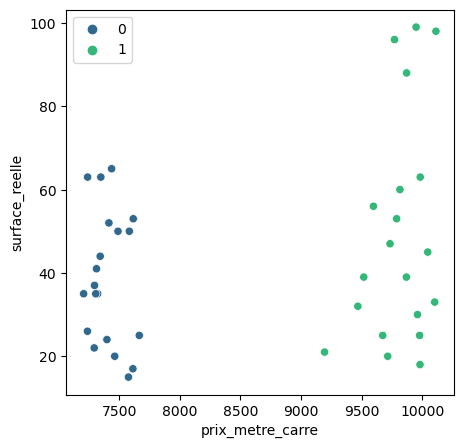

In [60]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = clustering_data, y = 'surface_reelle', x = 'prix_metre_carre', hue=clusters_predictions,palette='viridis')

In [56]:
# Situer les centroïdes de nos données en fonction des cluster
# Afficher le prix moyen du mètre carré et la surface réelle en fonction de la nature des biens

clustering_data_encode["prix_moyen_metre_carre"] =clustering_data_encode["prix_metre_carre"]
clustering_data_encode.groupby('nature_du_bien')[['surface_reelle', 'prix_moyen_metre_carre']].mean()

,surface_reelle,prix_moyen_metre_carre
nature_du_bien,,
Appartement,38.60,7408.775030
Local industriel. commercial ou assimilé,49.35,9806.924674


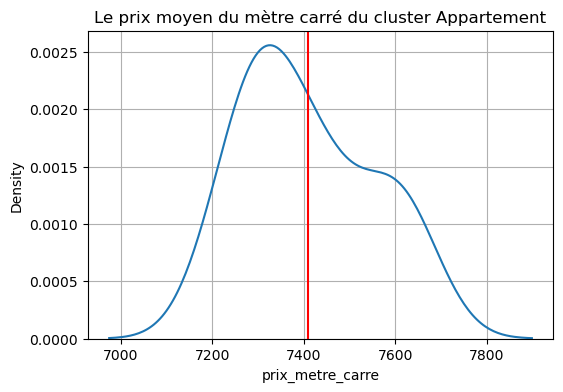

In [57]:
#Créer un visuel pour afficher le prix moyen du mètre carré du cluster "Appartement"
plt.figure(figsize=(6,4))
sns.kdeplot(data=clustering_data_encode[clustering_data_encode['nature_du_bien'] == 'Appartement'], x="prix_metre_carre")


# Identifier la valeur moyenne
mean_value = clustering_data_encode[clustering_data_encode['nature_du_bien'] == 'Appartement']['prix_metre_carre'].mean()

# Tracer une ligne pour représenter le prix moyen du mètre carré
plt.grid()
plt.axvline(x=mean_value, color='red')
plt.title('Le prix moyen du mètre carré du cluster Appartement')
plt.show()

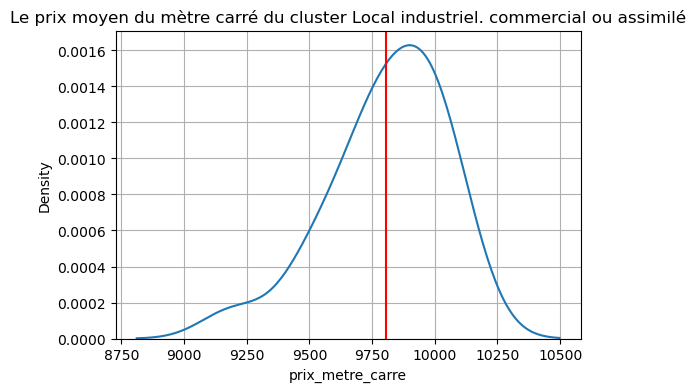

In [58]:
#Créer un visuel pour afficher le prix moyen du mètre carré du cluster "Local industriel. commercial ou assimilé"
plt.figure(figsize=(6,4))
sns.kdeplot(data=clustering_data_encode[clustering_data_encode['nature_du_bien'] == 'Local industriel. commercial ou assimilé'], x="prix_metre_carre")


# Identifier la valeur moyenne
mean_value = clustering_data_encode[clustering_data_encode['nature_du_bien'] == 'Local industriel. commercial ou assimilé']['prix_metre_carre'].mean()

# Tracer une ligne pour représenter le prix moyen du mètre carré
plt.grid()
plt.axvline(x=mean_value, color='red')
plt.title('Le prix moyen du mètre carré du cluster Local industriel. commercial ou assimilé')
plt.show()

Mes conclusions sur l'analyse et les limites de l'exercice :

- L'échantillon comprend un nombre d'appartement égal à celui des locaux.

- La présence de deux superficies identiques dans le 19ème arrondissement ayant des prix différents porte à croire que le type de bien peut être le critère de différentiation et donc on peut poser l'hypothèse que le prix le plus élevé représente un local et le moins élevé représente un appartement.

- Pour pondérer notre hypothèse, il y a des paramètres qui pourraient fausser nos résultats comme par exemple: dans la catégorie des assimilés on peut avoir des bureaux situés dans des quartiers peu fréquentés et nécessitant de gros travaux de rénovations alors qu'à côté pour la même superficie on a un appartement dans un quartier attractif refait à neuf offrant beaucoup de commodités ce dernier aura un prix supérieur à celui du bureau et risque d'être classé dans la catégorie Local industriel.commercial ou assimilé.

- Notre algorithme de clustering possède quelques limites quand on fait face à une prise en compte de plusieurs paramètres qui compléxifie les calculs. Il sera donc plus compliqué de faire ressortir des groupes homogènes et biens distincts sans qu'ils ne se chevauchent.